In [88]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('activity7.csv').set_index('Country')

***1. Use Excel to find the summation of x, y, xy,  $x^{2}$, and $y^{2}$.***

In [89]:
sumX= df['Birth Rate'].sum()
sumY = df['Life Expectancy'].sum()
print("Sum of x: " + str(sumX) + '\nSum of y: '+ str(sumY))
sumXY = 0
sumX2 = 0
sumY2 = 0
for _,row in df.iterrows():
    sumXY += row.iloc[0]*row.iloc[1]
    sumX2 += row.iloc[0] ** 2
    sumY2 += row.iloc[1] ** 2

print("Sum of xy: "+str(sumXY) + "\nSum of x^2: " + str(sumX2) + "\nSum of y^2: "+str(sumY2))


Sum of x: 466
Sum of y: 1788
Sum of xy: 34382
Sum of x^2: 9736
Sum of y^2: 133512


***2. Use Excel to find the covariance $S_{xy}$ .***


In [90]:
cov = df.cov()['Birth Rate'].iloc[1]
print(cov)

-14.565217391304348


**Covariance of xy is -14.562**

***3. Use Excel to calculate $S_{x}$ , $S_{y}$ , and the correlation coefficient.***

In [91]:
sx = df['Birth Rate'].std()
sy = df['Life Expectancy'].std()
print('x devation: '+str(sx))
print("y deviation: "+str(sy))
corrCoef = df.corr()['Birth Rate'].iloc[1]
print("Correlation coeffecient: " + str(corrCoef))


x devation: 5.468619304856508
y deviation: 3.647512553245973
Correlation coeffecient: -0.7302011028563675


***4. Use Excel to calculate the coefficient of determination.***

In [92]:
print("Coefficient of determination: " + str(corrCoef**2))


Coefficient of determination: 0.5331936506126554


***5. Use Excel to calculate $𝑏_{1}$ , 𝑥, 𝑦, and $𝑏_{0}$ .***

slope: -0.48703658832081403 intercept: 83.9566270898958
Model: ŷ=83.957+(-0.487)x


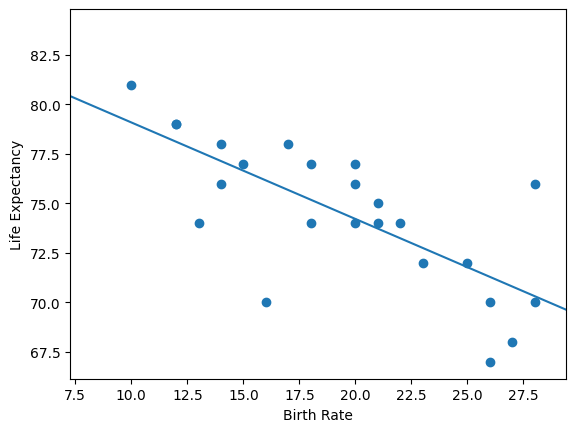

In [93]:
b1 = cov / sx**2
b0 = df['Life Expectancy'].mean() - (b1*df['Birth Rate'].mean())
print('slope: ' + str(b1) + ' intercept: ' + str(b0))
print(f"Model: ŷ={b0:.3f}+({b1:.3f})x")

fig, ax= plt.subplots()
ax.set_xlabel('Birth Rate') 
ax.set_ylabel('Life Expectancy')
ax.axline((0,b0), slope = b1)
scatter = plt.scatter(df['Birth Rate'], df['Life Expectancy'])
ax.set_xlim(df['Birth Rate'].min()-df['Birth Rate'].std()/2)
plt.show()


***6. Given the scatterplot and regression equation you created in Excel and the information you have found up to
this point, do you think there is a linear relationship between birthrate and life expectancy?***

**ANSWER: Yes, it seems linear**

***7. Given the regression equation above, what is the general trend for life expectancy given a country’s birthrate? Is
this a positive or negative association?***

**ANSWER: There seems to be a negative relationship**

***8. Notice that Paraguay had a birth rate of 28 per 1000 and a life expectancy of 76 years. Find Paraguay’s expected
life expectancy and the residual. Do you think the model accurately predicted the life expectancy for Paraguay?***

In [94]:
predParaguay = b0 + b1*28
print(f"predicted expectancy: {predParaguay: .3f}, Life expectency standard devation: {df['Life Expectancy'].std()}")

predicted expectancy:  70.320, Life expectency standard devation: 3.647512553245973


**ANSWER: The model predicts 70 years of life expentency vs. 76 measured, that is not within a standard devation of what has been measured. Not a good prediction**

***9. Find another country that the model poorly predicted the life expectancy of. Find the expected life expectancy
of the country and the residual***

In [95]:
yStd = df['Life Expectancy'].std()
print("Bad predictions (outside 1 standard deviation), life expectency, and residual: \n")
for index,row in df.iterrows():
    y = row.iloc[1]
    pred = b0 + b1*row.iloc[0]
    lowStd = y - yStd
    highStd = y + yStd
    if pred < lowStd or pred > highStd:
        print(f"{index}: predicted life expectency: {round(pred,3)}, residual: {round(y-pred,3)}")

Bad predictions (outside 1 standard deviation), life expectency, and residual: 

Bahamas: predicted life expectency: 76.164, residual: -6.164
Bolivia: predicted life expectency: 71.294, residual: -4.294
Paraguay: predicted life expectency: 70.32, residual: 5.68


***10. Notice that Nicaragua had a birth rate of 23 per 1000 and a life expectancy of 72 years (23, 72). Find Nicaragua’s
expected life expectancy and the residual. Do you think the model accurately predicted the life expectancy for
Nicaragua?***

In [96]:
pred = pred = b0 + b1*23
y= 72
lowStd = pred - yStd
highStd = pred + yStd
print(f"Predicted life expectency: {pred:.3f}.\nStandard devation interval from prediction: ({round(highStd,1)},{round(lowStd,1)})")

Predicted life expectency: 72.755.
Standard devation interval from prediction: (76.4,69.1)


**ANSWER: Yes, measured expected life expectency is within 1 standard devation of predicted.**

***11. Find another country that the model accurately predicted the life expectancy of. Find the expected life
expectancy of the country and the residual.***

In [97]:
print("Good predictions (within 1 standard devation of prediction): \n")
for index,row in df.iterrows():
    y = row.iloc[1]
    pred = b0 + b1*row.iloc[0]
    lowStd = y - yStd
    highStd = y + yStd
    if pred > lowStd and pred < highStd:
        print(f"{index}: predicted life expectency: {round(pred,3)}, residual: {round(y-pred,3)}")

Good predictions (within 1 standard devation of prediction): 

Argentina: predicted life expectency: 75.19, residual: 1.81
Barbados: predicted life expectency: 77.625, residual: -3.625
Belize: predicted life expectency: 70.807, residual: -2.807
Canada : predicted life expectency: 79.086, residual: 1.914
Chile: predicted life expectency: 76.651, residual: 0.349
Colombia: predicted life expectency: 75.19, residual: -1.19
Costa Rica: predicted life expectency: 75.677, residual: 2.323
Dominican Republic: predicted life expectency: 73.242, residual: 0.758
Ecuador: predicted life expectency: 73.729, residual: 1.271
El Salvador: predicted life expectency: 71.781, residual: 0.219
Guatemala: predicted life expectency: 70.32, residual: -0.32
Honduras: predicted life expectency: 71.294, residual: -1.294
Jamaica: predicted life expectency: 74.216, residual: -0.216
Mexico: predicted life expectency: 74.216, residual: 1.784
Nicaragua: predicted life expectency: 72.755, residual: -0.755
Panama: predi